In [1]:
import tensorflow as tf

# 2. TF Core Learning Algorithm

- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

### 2.1. Linear Regression

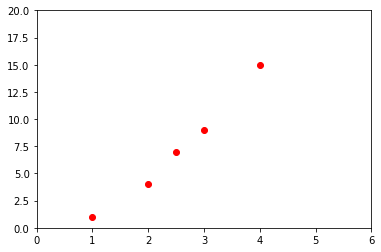

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = [1,2,2.5,3,4]
y = [1,4,7,9,15]
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])
plt.show()

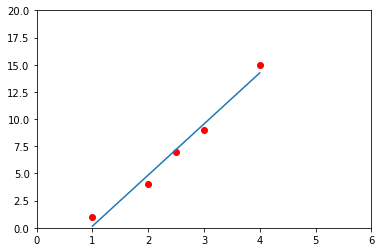

In [3]:
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

y = mx + b
- b - y intercept
- m - slope

# Practice

In [4]:
# %tensorflow_version 2.x

### importing useful libraries

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

### preparing dataset

In [6]:
dftrain = pd.read_csv('titanic_train.csv', index_col = 'PassengerId')
dfeval = pd.read_csv('titanic_test.csv', index_col = 'PassengerId')

In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- **have not used proper method to deal with `nan` values**
- **in my opinion, could have gone for another learning model to fill those values**

In [8]:
dftrain.drop('Cabin',axis=1, inplace=True)

In [9]:
dfeval.drop('Cabin',axis=1, inplace=True)

In [10]:
dftrain.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Embarked    889
dtype: int64

In [11]:
dftrain.Age.isnull().sum()

177

In [12]:
dfeval.count()

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Embarked    418
dtype: int64

In [13]:
A = dftrain[dftrain.Age.isnull()].index.tolist()

In [14]:
A

[6,
 18,
 20,
 27,
 29,
 30,
 32,
 33,
 37,
 43,
 46,
 47,
 48,
 49,
 56,
 65,
 66,
 77,
 78,
 83,
 88,
 96,
 102,
 108,
 110,
 122,
 127,
 129,
 141,
 155,
 159,
 160,
 167,
 169,
 177,
 181,
 182,
 186,
 187,
 197,
 199,
 202,
 215,
 224,
 230,
 236,
 241,
 242,
 251,
 257,
 261,
 265,
 271,
 275,
 278,
 285,
 296,
 299,
 301,
 302,
 304,
 305,
 307,
 325,
 331,
 335,
 336,
 348,
 352,
 355,
 359,
 360,
 365,
 368,
 369,
 376,
 385,
 389,
 410,
 411,
 412,
 414,
 416,
 421,
 426,
 429,
 432,
 445,
 452,
 455,
 458,
 460,
 465,
 467,
 469,
 471,
 476,
 482,
 486,
 491,
 496,
 498,
 503,
 508,
 512,
 518,
 523,
 525,
 528,
 532,
 534,
 539,
 548,
 553,
 558,
 561,
 564,
 565,
 569,
 574,
 579,
 585,
 590,
 594,
 597,
 599,
 602,
 603,
 612,
 613,
 614,
 630,
 634,
 640,
 644,
 649,
 651,
 654,
 657,
 668,
 670,
 675,
 681,
 693,
 698,
 710,
 712,
 719,
 728,
 733,
 739,
 740,
 741,
 761,
 767,
 769,
 774,
 777,
 779,
 784,
 791,
 793,
 794,
 816,
 826,
 827,
 829,
 833,
 838,
 840,
 84

In [15]:
for i in A:
    dftrain.loc[i,'Age'] = 24.00

In [16]:
dftrain.Age.isnull().sum()

0

In [17]:
B = dftrain[dftrain.Embarked.isnull()].index.to_list()

In [18]:
dftrain.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
for i in B:
    dftrain.loc[i,'Embarked'] = 'S'

In [20]:
dfeval.count()

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Embarked    418
dtype: int64

In [21]:
dfeval.loc[1044,'Fare'] = (dfeval.Fare.mean()).astype(float)

In [22]:
C = dfeval[dfeval.Age.isnull()].index.to_list()

In [23]:
for i in C:
    dfeval.loc[i,'Age'] = 24.00

In [24]:
dfeval.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [25]:
dfeval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 48.8+ KB


In [26]:
y_train = dftrain.pop('Survived')

In [27]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [28]:
yeval = pd.read_csv('titanic_test_ylabels.csv', index_col='PassengerId')
y_eval = yeval.pop('Survived')
y_eval

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [29]:
dftrain.shape

(891, 9)

In [30]:
dfeval.shape

(418, 9)

### visualizing data

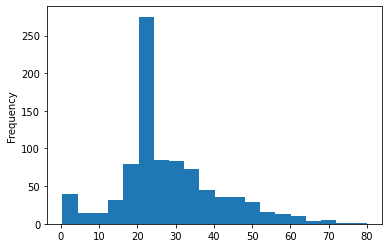

In [31]:
dftrain['Age'].plot(kind='hist',bins=20)
plt.show()

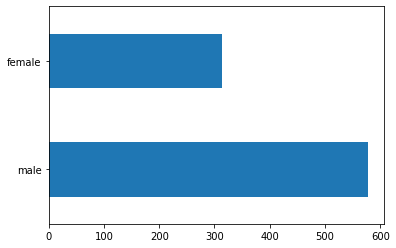

In [32]:
dftrain.Sex.value_counts().plot(kind='barh')
plt.show()

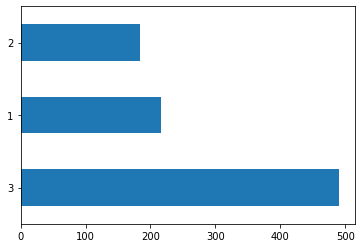

In [33]:
dftrain.Pclass.value_counts().plot(kind='barh')
plt.show()

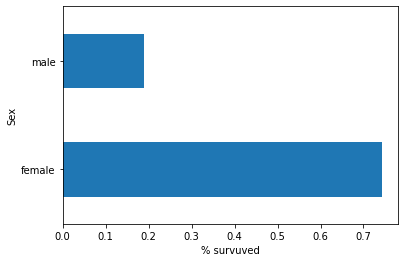

In [34]:
pd.concat([dftrain, y_train],axis=1).groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% survuved')
plt.show()

In [35]:
dftrain.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
dftrain.nunique()

Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

### manipulating data

In [37]:
categorical_columns = ['Pclass','Sex','SibSp','Parch','Embarked']
numeric_columns = ['Age','Fare']

- crating columns for categorical columns
- below code is `universal`

In [38]:
feature_columns = []
for feature_name in categorical_columns:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='SibSp', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(0, 1, 2, 5, 3, 4, 6), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


### training data in batches

>**Input Function**<br>
>- takes data in batches and store in `tf.data.Dataset`
>- below code is `universal`

In [39]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs) # create batches
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

### creating the model

In [40]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\zatha\\AppData\\Local\\Temp\\tmpu89rw99h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### training the model and prediction

In [41]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

0.95454544


# Result

In [42]:
result = list(linear_est.predict(eval_input_fn))
clear_output()
print(dfeval.iloc[6])
print('did he actually survived? {}, because the probability was: {}'.format('Yes' if y_eval.iloc[6] else 'No', result[6]['probabilities'][1]))
# print('with probability:',result[6]['probabilities'][1])

Pclass                         3
Name        Connolly, Miss. Kate
Sex                       female
Age                         30.0
SibSp                          0
Parch                          0
Ticket                    330972
Fare                      7.6292
Embarked                       Q
Name: 898, dtype: object
did he actually survived? Yes, because the probability was: 0.6268119215965271


- `probabilities` of survival -> index 1
- in `if` condition: survived -> 1; not survived -> 0

In [43]:
clear_output()
print(dfeval.iloc[2])
print('did he actually survived? {}, because the probability was: {}'.format('Yes' if y_eval.iloc[2] else 'No', result[2]['probabilities'][1]))
# print('with probability:',result[6]['probabilities'][1])

Pclass                              2
Name        Myles, Mr. Thomas Francis
Sex                              male
Age                              62.0
SibSp                               0
Parch                               0
Ticket                         240276
Fare                           9.6875
Embarked                            Q
Name: 894, dtype: object
did he actually survived? No, because the probability was: 0.12467660009860992
